In [38]:
import networkx as nx
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt

# full network
G = nx.read_gpickle('HarryPotterFullNetwork.gpickle')

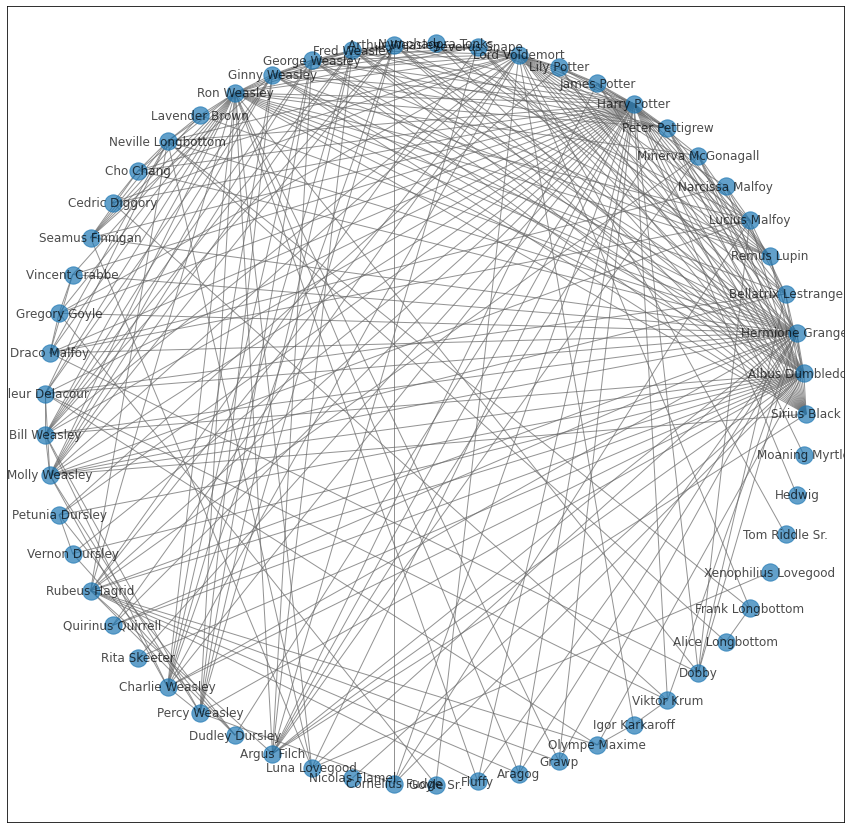

In [39]:
plt.figure(figsize=(15,15))
nx.draw_networkx(G, nx.circular_layout(G), alpha=0.7, with_labels=True, edge_color='.4')

In [43]:
df = pd.DataFrame(index=G.nodes())
df['School'] = pd.Series(nx.get_node_attributes(G, 'School')) 
df['house'] = pd.Series(nx.get_node_attributes(G, 'house')) 
df['Gender'] = pd.Series(nx.get_node_attributes(G, 'Gender')) 
df['Species/Race'] = pd.Series(nx.get_node_attributes(G, 'Species/Race')) 
df['Profession'] = pd.Series(nx.get_node_attributes(G, 'Profession')) 
df['Blood'] = pd.Series(nx.get_node_attributes(G, 'Blood')) 

df.head()

,School,house,Gender,Species/Race,Profession,Blood
Sirius Black,Hogwarts,Gryffindor,Male,Wizard,Unknown,Pure blood
Albus Dumbledore,Hogwarts,Unknown,Male,Wizard,Headmaster at Hogwarts School,Half-blood
Hermione Granger,Hogwarts,Gryffindor,Female,Witch,Department for the Regulation and Control of M...,Muggle-born
Bellatrix Lestrange,Hogwarts,Slytherin,Female,Witch,Unknown,Pure blood
Remus Lupin,Hogwarts,Unknown,Male,Wizard and Werewolf,His lycanthropy made it near impossible for hi...,Half-blood


In [45]:
df['clustering'] = pd.Series(nx.clustering(G)) 
df['degree'] = pd.Series(dict(G.degree())) 
df.head()

,School,house,Gender,Species/Race,Profession,Blood,clustering,degree
Sirius Black,Hogwarts,Gryffindor,Male,Wizard,Unknown,Pure blood,0.533333,21
Albus Dumbledore,Hogwarts,Unknown,Male,Wizard,Headmaster at Hogwarts School,Half-blood,0.359606,29
Hermione Granger,Hogwarts,Gryffindor,Female,Witch,Department for the Regulation and Control of M...,Muggle-born,0.310484,32
Bellatrix Lestrange,Hogwarts,Slytherin,Female,Witch,Unknown,Pure blood,0.563636,11
Remus Lupin,Hogwarts,Unknown,Male,Wizard and Werewolf,His lycanthropy made it near impossible for hi...,Half-blood,0.727273,12


In [53]:
df2 = pd.DataFrame(index=G.edges()) 
df2['relation'] = pd.Series(nx.get_edge_attributes(G, 'relation'))
df2.head(10)

relation
Sirius Black Albus Dumbledore           +
             Hermione Granger           +
             Bellatrix Lestrange        -
             Remus Lupin                +
             Lucius Malfoy              -
             Narcissa Malfoy            -
             Minerva McGonagall         +
             Peter Pettigrew            -
             Harry Potter               +
             James Potter               +

In [55]:
df2['preferential attachment']= [i[2] for i in nx.preferential_attachment(G, df2.index)]
df2['resource_allocation_index']= [i[2] for i in nx.resource_allocation_index(G, df2.index)]
df2.head(10)

relation  preferential attachment  \
Sirius Black Albus Dumbledore           +                      609   
             Hermione Granger           +                      672   
             Bellatrix Lestrange        -                      231   
             Remus Lupin                +                      252   
             Lucius Malfoy              -                      231   
             Narcissa Malfoy            -                      105   
             Minerva McGonagall         +                      189   
             Peter Pettigrew            -                      273   
             Harry Potter               +                      924   
             James Potter               +                      168   

                                  resource_allocation_index  
Sirius Black Albus Dumbledore                      1.201722  
             Hermione Granger                      0.780712  
             Bellatrix Lestrange                   0.722289  
             Remus Lupin                           0.855117  
             Lucius Malfoy                         0.509235  
             Narcissa Malfoy                       0.214076  
             Minerva McGonagall                    0.316797  
             Peter Pettigrew                       0.739999  
             Harry Potter                          1.304386  
             James Potter                          0.458058